In [425]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch import Tensor
from torchvision.utils import save_image
from CustomDataset import CustomDataset
from PIL import Image
from VanillaVAE import VanillaVAE


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
INPUT_DIM = 3
#38804
Z_DIM = 1000
PATH = "model_prvenac.pt"

In [426]:
model = VanillaVAE(INPUT_DIM, Z_DIM)
checkpoint = torch.load(PATH,map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1926


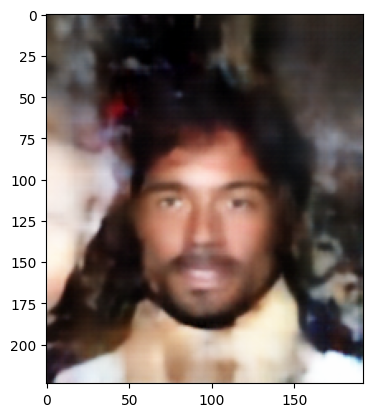

In [431]:
import random

def test_inference(img_path, coef = 1.5, delta_mu = 0):

    import matplotlib.pyplot as plt
    import numpy as np

    image = Image.open(img_path)
    image = image.resize((192, 224))
    transform=transforms.ToTensor()



    encodings = []
    with torch.no_grad():    
        x = transform(image).unsqueeze(0).to(device)
        # x = torch.rand_like(transform(no_glass_images[i]).unsqueeze(0)).to(device) 
        # x = torch.zeros_like(x).to(device)
        out = model.generate_with_delta(x,delta_mu*coef,without_variance=False) #torch.zeros_like(delta_mu))
    img = torchvision.transforms.functional.to_pil_image(out[0], mode=None)

    save_image(out[0], f"generated_ex.png")
    out = out.view(-1, 3, 224, 192)
    out = np.transpose(out, (0, 2, 3, 1))


    plt.imshow(out[0])

delta_mu = torch.load('delta_mu.pt')
coef = 3
# img_name = 186073
img_name = 1926 #random.randint(1000,3900)
print(img_name)
img_path = f"data/img_align_celeba/00{img_name}.jpg"
#img_path =  "data/img_align_celeba/170281.jpg" #"C:\\Users\\Mihailo\\Pictures\\test.jpg"
# img_path =  "C:\\Users\\Mihailo\\Pictures\\jefta.jpg"

test_inference(img_path=img_path, coef=coef, delta_mu=delta_mu)

1926


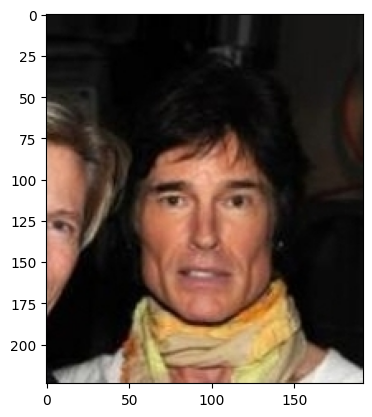

In [424]:
import matplotlib.pyplot as plt
print(img_name)
img = Image.open(f'data/img_align_celeba/00{img_name}.jpg')
plt.imshow(img)